## problem Statement 4
Telecall uses 4 centers around the globe to process customer order forms. They audit a certain % of the customer order forms. Any error in order form renders it defective and must be reworked before processing. The manager wants to check whether the defective % varies by center. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

> ### 1.Business Problem

1.1 What is the business objective?
- To determine whether the proportion of defective customer order forms differs significantly across the four processing centers. This helps management identify centers with potential quality control issues and improve operational efficiency.

1.2 Are there any constraints?
- Limited to Audit Data: Only a sample of audited forms is available, not the entire population.
- Binary Outcome: Each form is either defective or not—no information on type or severity of defects.



> ### 2.data dictionary
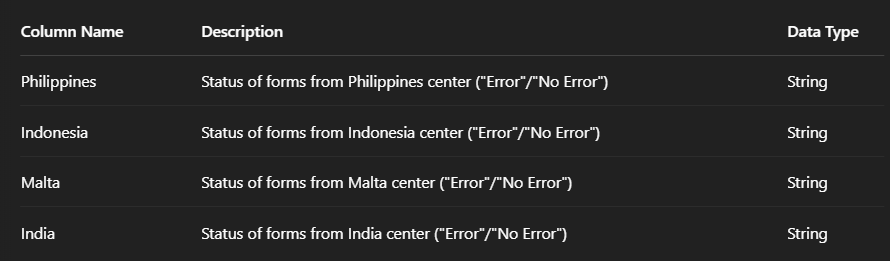

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("CustomerOrderform.csv")
df.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [7]:
#encode data
error_counts=pd.DataFrame({
    'Center':df.columns,
    'Defective':[df[col].value_counts().get('Defective', 0) for col in df.columns],
    'Error Free':[df[col].value_counts().get('Error Free', 0) for col in df.columns]
})

In [8]:
error_counts.head()

,Center,Defective,Error Free
0,Phillippines,29,271
1,Indonesia,33,267
2,Malta,31,269
3,India,20,280


> ### 3.EDA

In [13]:
df=error_counts

In [14]:
df.describe()

,Defective,Error Free
count,4.000000,4.000000
mean,28.250000,271.750000
std,5.737305,5.737305
min,20.000000,267.000000
25%,26.750000,268.500000
50%,30.000000,270.000000
75%,31.500000,273.250000
max,33.000000,280.000000


In [15]:
df.isna().sum()

Center        0
Defective     0
Error Free    0
dtype: int64

In [20]:
#extract numeric columns
numeric_cols=df.select_dtypes(include=['int64','float64']).columns

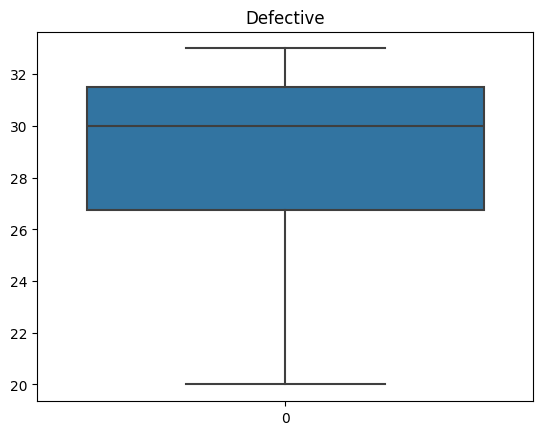

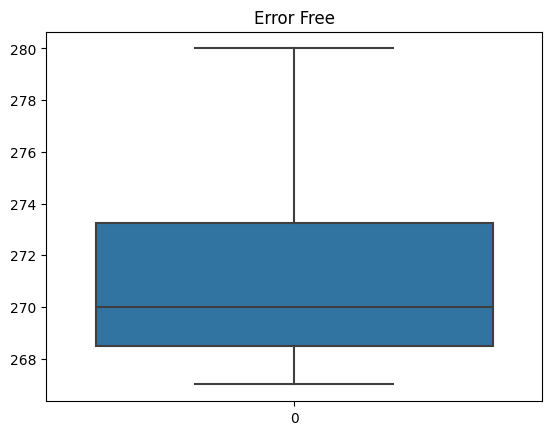

In [21]:
for i in numeric_cols:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [22]:
df.duplicated().sum()

0

In [33]:
from scipy.stats import chi2_contingency

In [34]:
#Null hypothesis(H0): No significant difference in defective % across centers
#Alternate Hypothesis(H1): Significant difference in defective % across centers 

In [37]:
contingency_table = error_counts[['Defective', 'Error Free']].values

In [38]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [39]:
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 3.8589606858203545
p-value: 0.2771020991233144
Degrees of Freedom: 3
Expected Frequencies:
 [[ 28.25 271.75]
 [ 28.25 271.75]
 [ 28.25 271.75]
 [ 28.25 271.75]]


In [40]:
#p-value=0.2771021>0.05

In [41]:
#Fail to reject the null hypothesis
#No significant difference in defective % across centers